# [Section 1] **Data Preparation for Readmission Prediction**


 ED visit dataset and predict the risk of returning to the Emergency Department after discharge. Note that the readmission here is the return to ED, therefore it is not the typical inpatient admission. Still, the principles and prediction procedures in this AI workflow are similar to readmission prediction.


Understanding of our data: This includes reviewing the structure of the data, reviewing information that is represented in different data fields, and performing basic descriptive and exploratory analysis.

This stage will inform how to model this data and may provide hints about particularly promising directions as we move forward with our predictive modeling.

This step helps to prepare the data for logistic regression modeling.


#[Section 2] Setting Up the Colab Environment

Set up the environment, including importing packages and loading the data.

<br>

In [74]:
# import the necessary packages

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
import missingno as msno
from sklearn.preprocessing import MinMaxScaler
from google.colab import files

#To display all columns for output (given we have relatively small number)
pd.options.display.max_columns = None


**Loading Dataset**

The data is hosted on Kaggle and needs to be imported for analysis within the Colab environment.

In [75]:
#Setting user info as environmental variables to access private dataset
os.environ['KAGGLE_USERNAME'] = "aimaheadpdp"
os.environ['KAGGLE_KEY'] = "c86b2097ef6b3e2d0cd80f12a5655c9c"

#Downloading Data from Kaggle
!kaggle datasets download -d aimaheadpdp/epicsample

Dataset URL: https://www.kaggle.com/datasets/aimaheadpdp/epicsample
License(s): unknown
epicsample.zip: Skipping, found more recently modified local copy (use --force to force download)


In [76]:
#Unzipping dataset and saving it to the Google Drive Working Directory
!unzip -o /content/epicsample.zip -d /content/

Archive:  /content/epicsample.zip
  inflating: /content/Epic_Sample.csv  


In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
# Load the dataset from the saved csv file using Pandas package
# We are using the convention of setting our dataset to be called 'df', which is short for dataframe
df = pd.read_csv('/content/Epic_Sample.csv')

#Show dimensions of dataframe
#Output shows we have 2001 rows (patient visits) and 21 columns (variables)
print(df.shape)

(2001, 21)


#[Section 3] **Reviewing the Data**:
After previewing the data, it was observed that each row represents a single patient visit while columns represent different data fields about that visit.


In [79]:
#Check the dimensions of the data
df.shape

(2001, 21)

In [80]:
#View the dataframe
df.head()

,INDEX,PAT_ENC_CSN_ID,ED_ARRIVAL_DEP_NAME,SEX,AGE,RACE,ETHNIC,FINANCIAL_CLASS,ED_ARRIVAL,ED_DEPART,ARRIVE_DEPART_MIN,ED_DISPO,ARRIVAL_ESI_ACUITY,HOSP_DISCH_TIME,ADMIT_PT_CLASS,RISK_OF_MORTALITY_C,RISK_OF_MORTALITY,SEVERITY_OF_ILLNESS_C,SEVERITY_OF_ILLNESS,CHARGES,RETURN
0,1,1.799581e+09,HOSPITAL_A,Female,62.0,Black or African American,Not Hispanic or Latino,Medicaid,3/23/2017 8:42,3/23/2017 14:00,318.0,Discharge,4-Less Urgent,3/23/2017 14:00,NaN,NaN,NaN,NaN,NaN,2058.10,0.0
1,2,3.300799e+09,HOSPITAL_A,Male,59.0,White,Not Hispanic or Latino,Medicare,8/12/2017 14:32,8/12/2017 19:00,268.0,Discharge,4-Less Urgent,8/12/2017 19:00,NaN,NaN,NaN,NaN,NaN,63.96,0.0
2,3,5.618200e+08,HOSPITAL_B,Female,33.0,Black or African American,Not Hispanic or Latino,Self-pay,1/18/2017 17:12,1/19/2017 0:01,409.0,Left prior to completing treatment,4-Less Urgent,1/19/2017 0:01,NaN,NaN,NaN,NaN,NaN,392.67,0.0
3,4,6.513226e+08,HOSPITAL_B,Female,65.0,Black or African American,Not Hispanic or Latino,Commercial,5/23/2017 6:40,5/23/2017 13:32,412.0,Discharge,3-Urgent,5/23/2017 13:32,NaN,NaN,NaN,NaN,NaN,1811.28,0.0
4,5,3.003348e+09,HOSPITAL_B,Male,42.0,Black or African American,Not Hispanic or Latino,MA MCO,2/15/2017 14:43,2/15/2017 21:00,377.0,Discharge,4-Less Urgent,2/15/2017 21:00,NaN,NaN,NaN,NaN,NaN,1187.85,0.0



# [Section 4] **Exploring the Data**:

To understand what information is available in the data and in what formats.

**Exploring Data Types**

Information can be represented as different data types including categorical or numeric data. Since different data types often require different types of manipulation or analysis, it is helpful to know the data types of each variable.

In [81]:
#Checking data types for each variable
df.dtypes

,0
INDEX,int64
PAT_ENC_CSN_ID,float64
ED_ARRIVAL_DEP_NAME,object
SEX,object
AGE,float64
RACE,object
ETHNIC,object
FINANCIAL_CLASS,object
ED_ARRIVAL,object
ED_DEPART,object



## Summary of Categorical Data
To learn more about the non-numeric variables in the dataset, simple summary of these types of variables is performed.

The summary of the categorical variables will show a few pieces of information:
  

In [82]:
#Summary statistics for the categorical variables in the dataframe
df.describe(include=['object']).T

,count,unique,top,freq
ED_ARRIVAL_DEP_NAME,2000,3,HOSPITAL_C,863
SEX,2000,2,Male,1138
RACE,1984,8,Black or African American,1521
ETHNIC,1972,4,Not Hispanic or Latino,1909
FINANCIAL_CLASS,2000,11,MA MCO,980
ED_ARRIVAL,2000,1999,7/1/2017 2:31,2
ED_DEPART,2000,1994,5/21/2017 23:50,2
ED_DISPO,1998,16,Discharge,1172
ARRIVAL_ESI_ACUITY,1839,5,3-Urgent,1043
HOSP_DISCH_TIME,2000,1991,3/1/2017 16:15,2


There are 2000 observations with ```ED_NAME``` data. There are 3 classes (or categories) for this variable, with the most frequent class being ```HOSPITAL_C```, which occurs 863 times in the dataset.

Next, the frequency of different classes in categorical variables is checked in depth by using groupby and size methods for the dataframe.

In [83]:
#The different types of FINANCIAL_CLASS categories in the data and their frequency
print(df.groupby(['FINANCIAL_CLASS']).size())

FINANCIAL_CLASS
Blue Shield                  145
Commercial                   167
MA MCO                       980
Medicaid                     111
Medicare                     350
Medicare Replacement Plan     59
Military                      10
Other                          9
Out of State Medicaid          3
Self-pay                     161
Worker's Comp                  5
dtype: int64


There are a few infrequent classes, so these will be grouped into 'Other'.
Then, the name is changed to be more concise.

In [84]:
df['FINANCIAL_CLASS'] = df['FINANCIAL_CLASS'].replace({
    "Medicare Replacement Plan": "Other",
    "Military": "Other",
    "Out of State Medicaid": "Other",
    "Worker's Comp": "Other"
})
print (df.groupby(['FINANCIAL_CLASS']).size())

FINANCIAL_CLASS
Blue Shield    145
Commercial     167
MA MCO         980
Medicaid       111
Medicare       350
Other           86
Self-pay       161
dtype: int64


Looked into 'ED_DISPO' data.

In [85]:
print((df.groupby(['ED_DISPO']).size()))

ED_DISPO
AMA                                              25
Admit                                           236
Admit to External Psychiatric Facility            1
Admit to UMMS Psychiatry                          1
Arrived in Error                                  6
Deceased                                          2
Discharge                                      1172
Elopement                                        21
LWBS after Triage                               159
LWBS before Triage                              111
Left prior to completing treatment               49
Left without signing discharge instructions      14
Observation                                     135
Send to L&D Before Rooming (Mom)                 40
Send to L&D after Rooming                         4
Transfer                                         22
dtype: int64


In [86]:
# ED_DISPO
df['ED_DISPO'] = df['ED_DISPO'].replace({
    "Admit to External Psychiatric Facility": "Admit",
    "Admit to UMMS Psychiatry": "Admit",
    "Left prior to completing treatment": "Left Early",
    "Left without signing discharge instructions": "Left Early",
    "AMA": "Other",
    "Deceased": "Other",
    "Transfer": "Other",
    "Arrived in Error": "Other",
    "Elopement": "Other",
    "Send to L&D Before Rooming (Mom)": "Admit",
    "Send to L&D after Rooming": "Admit"
})
print (df.groupby(['ED_DISPO']).size())

ED_DISPO
Admit                  282
Discharge             1172
LWBS after Triage      159
LWBS before Triage     111
Left Early              63
Observation            135
Other                   76
dtype: int64


In [87]:
df.rename(columns={"ARRIVAL_ESI_ACUITY": "ARRIVAL_ESI",
                   "ED_ARRIVAL_DEP_NAME": "ED_NAME",
                   "FINANCIAL_CLASS": "INSURANCE"}, inplace=True)
df.dtypes

,0
INDEX,int64
PAT_ENC_CSN_ID,float64
ED_NAME,object
SEX,object
AGE,float64
RACE,object
ETHNIC,object
INSURANCE,object
ED_ARRIVAL,object
ED_DEPART,object


## Summary of Numeric Data


In [88]:
#Summary statistics for numeric variables in the dataframe
df.describe(percentiles=[]).T

,count,mean,std,min,50%,max
INDEX,2001.0,1.001000e+03,5.777833e+02,1.00,1.001000e+03,2.001000e+03
PAT_ENC_CSN_ID,2000.0,2.570049e+09,1.427753e+09,509219.00,2.586226e+09,5.021049e+09
AGE,2000.0,4.669850e+01,1.646208e+01,22.00,4.500000e+01,1.200000e+02
ARRIVE_DEPART_MIN,2000.0,4.854135e+02,4.928692e+02,5.00,3.470000e+02,6.250000e+03
RISK_OF_MORTALITY_C,277.0,2.209386e+00,1.021252e+00,1.00,2.000000e+00,4.000000e+00
SEVERITY_OF_ILLNESS_C,277.0,2.696751e+00,9.019445e-01,1.00,3.000000e+00,4.000000e+00
CHARGES,1882.0,5.085388e+03,1.573571e+04,39.77,1.511805e+03,2.633797e+05
RETURN,2000.0,2.500000e-01,4.331210e-01,0.00,0.000000e+00,1.000000e+00


For example, there are 2000 observations with ```AGE``` data. The mean age is 46.70 with a standard deviation of 16.46. The minimum age observed in the data is 32, the median is 45, and the maximum is 120.

**Pivot Tables**

To summarize data by various subgroups
such as the mean values for numeric variables by ```SEX``` (```Male``` or ```Female```) and ```RETURN``` (```0.0```  or ```1.0```) variables. A value of ```0.0``` for the ```RETURN``` variable indicates no readmission whereas a value of ```1.0``` indicates that the patient was readmitted within 30 days.   

In [113]:
pd.pivot_table(
    df,
    values=['AGE', 'CHARGES'],
    index=['RETURN'],
    columns=['SEX'],
    aggfunc='mean'
)

AGE                 CHARGES             
SEX        Female       Male       Female         Male
RETURN                                                
0.0     44.096931  44.896708  2048.541774  1872.187761
1.0     53.411523  52.793774  4358.794568  4436.218132

The output of the pivot table showed that the average age for female patients who were not readmitted was 44.10 (with rounding) whereas the age of female patients who were readmitted was 53.41. Moreover, a similar pattern was found for the age of male patients. Based on this descriptive summary, **the age** could be a variable associated with increased **likelihood of readmission**.


#[Section 5] **Evaluate and Manage Data Quality-Preprocessing**

In this section, evaluating and managing data quality is done with the following steps:

1.   Managing outliers
2.   Managing missing values in the dataset





##1.Managing Outliers
*   Outliers can have a strong influence on model solutions, biasing results for future applications
*   The Standard method is used to identify the  outliers of continuous variables that leverage the interquartile range.


**Outlier Detection**

In [90]:
# find outliers for Charge  variable

IQR = df.CHARGES.quantile(0.75) - df.CHARGES.quantile(0.25)
Lower_fence = df.CHARGES.quantile(0.25) - (IQR * 3)
Upper_fence = df.CHARGES.quantile(0.75) + (IQR * 3)
print('Charges outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Charges outliers are values < -5112.102500000001 or > 8696.29


In [91]:
# find outliers for Arrive Depart Min  variable

IQR = df.ARRIVE_DEPART_MIN.quantile(0.75) - df.ARRIVE_DEPART_MIN.quantile(0.25)
Lower_fence = df.ARRIVE_DEPART_MIN.quantile(0.25) - (IQR * 3)
Upper_fence = df.ARRIVE_DEPART_MIN.quantile(0.75) + (IQR * 3)
print('Arrive Dept Min outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Arrive Dept Min outliers are values < -1060.0 or > 1845.0


In [92]:
#finding outliers for age
IQR =df.AGE.quantile(0.75) - df.AGE.quantile(0.25)
Lower_fence = df.AGE.quantile(0.25) - (IQR * 3)
Upper_fence = df.AGE.quantile(0.75) + (IQR * 3)
print('Age outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Age outliers are values < -49.0 or > 140.0


All our outlier analyses led to lower boundaries with negative values. Since there are no negative values in the data, we need to focus on the upper boundary. To deal with the outliers, instead of dropping the cases the our dataset,  their values at the highest non-outlier values will be capped.

<br>
Using the "three times of the IQR" to define outliers get us very limient criteria. Need to choose more stringent ones. Age should be positive and less than 135.

IQR =df.AGE.quantile(0.75) - df.AGE.quantile(0.25)
<BR>
Lower_fence = max(df.AGE.quantile(0.25) - (IQR * 3), 0)
<BR>
Upper_fence = min(df.AGE.quantile(0.75) + (IQR * 3), 135)
<BR>
print('Age outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

**Handling Outliers**

In [93]:
def max_value(df, variable, top):
    return np.where(df[variable]>top, top, df[variable])

df['CHARGES'] = max_value(df, 'CHARGES',8696.29)
df['ARRIVE_DEPART_MIN'] = max_value(df, 'ARRIVE_DEPART_MIN', 1845)
df['AGE'] = max_value(df, 'AGE', 140.0)

df.describe(percentiles=[]).T

,count,mean,std,min,50%,max
INDEX,2001.0,1.001000e+03,5.777833e+02,1.00,1.001000e+03,2.001000e+03
PAT_ENC_CSN_ID,2000.0,2.570049e+09,1.427753e+09,509219.00,2.586226e+09,5.021049e+09
AGE,2000.0,4.669850e+01,1.646208e+01,22.00,4.500000e+01,1.200000e+02
ARRIVE_DEPART_MIN,2000.0,4.706830e+02,4.178762e+02,5.00,3.470000e+02,1.845000e+03
RISK_OF_MORTALITY_C,277.0,2.209386e+00,1.021252e+00,1.00,2.000000e+00,4.000000e+00
SEVERITY_OF_ILLNESS_C,277.0,2.696751e+00,9.019445e-01,1.00,3.000000e+00,4.000000e+00
CHARGES,1882.0,2.558370e+03,2.730585e+03,39.77,1.511805e+03,8.696290e+03
RETURN,2000.0,2.500000e-01,4.331210e-01,0.00,0.000000e+00,1.000000e+00


## 2.Managing Missing Values

*   Missing values in-large in the dataset may reflect poor data quality and may require exclusion from the model
*   Other data fields with low-to-moderate amount of missingness may be kept, but have to decide how to manage the missingness

* Therefore, it is important to explore patterns of missing values in the data
* "NA" represents missing values in a dataframe

**Identifying Variables with High Missingness**









<Axes: >

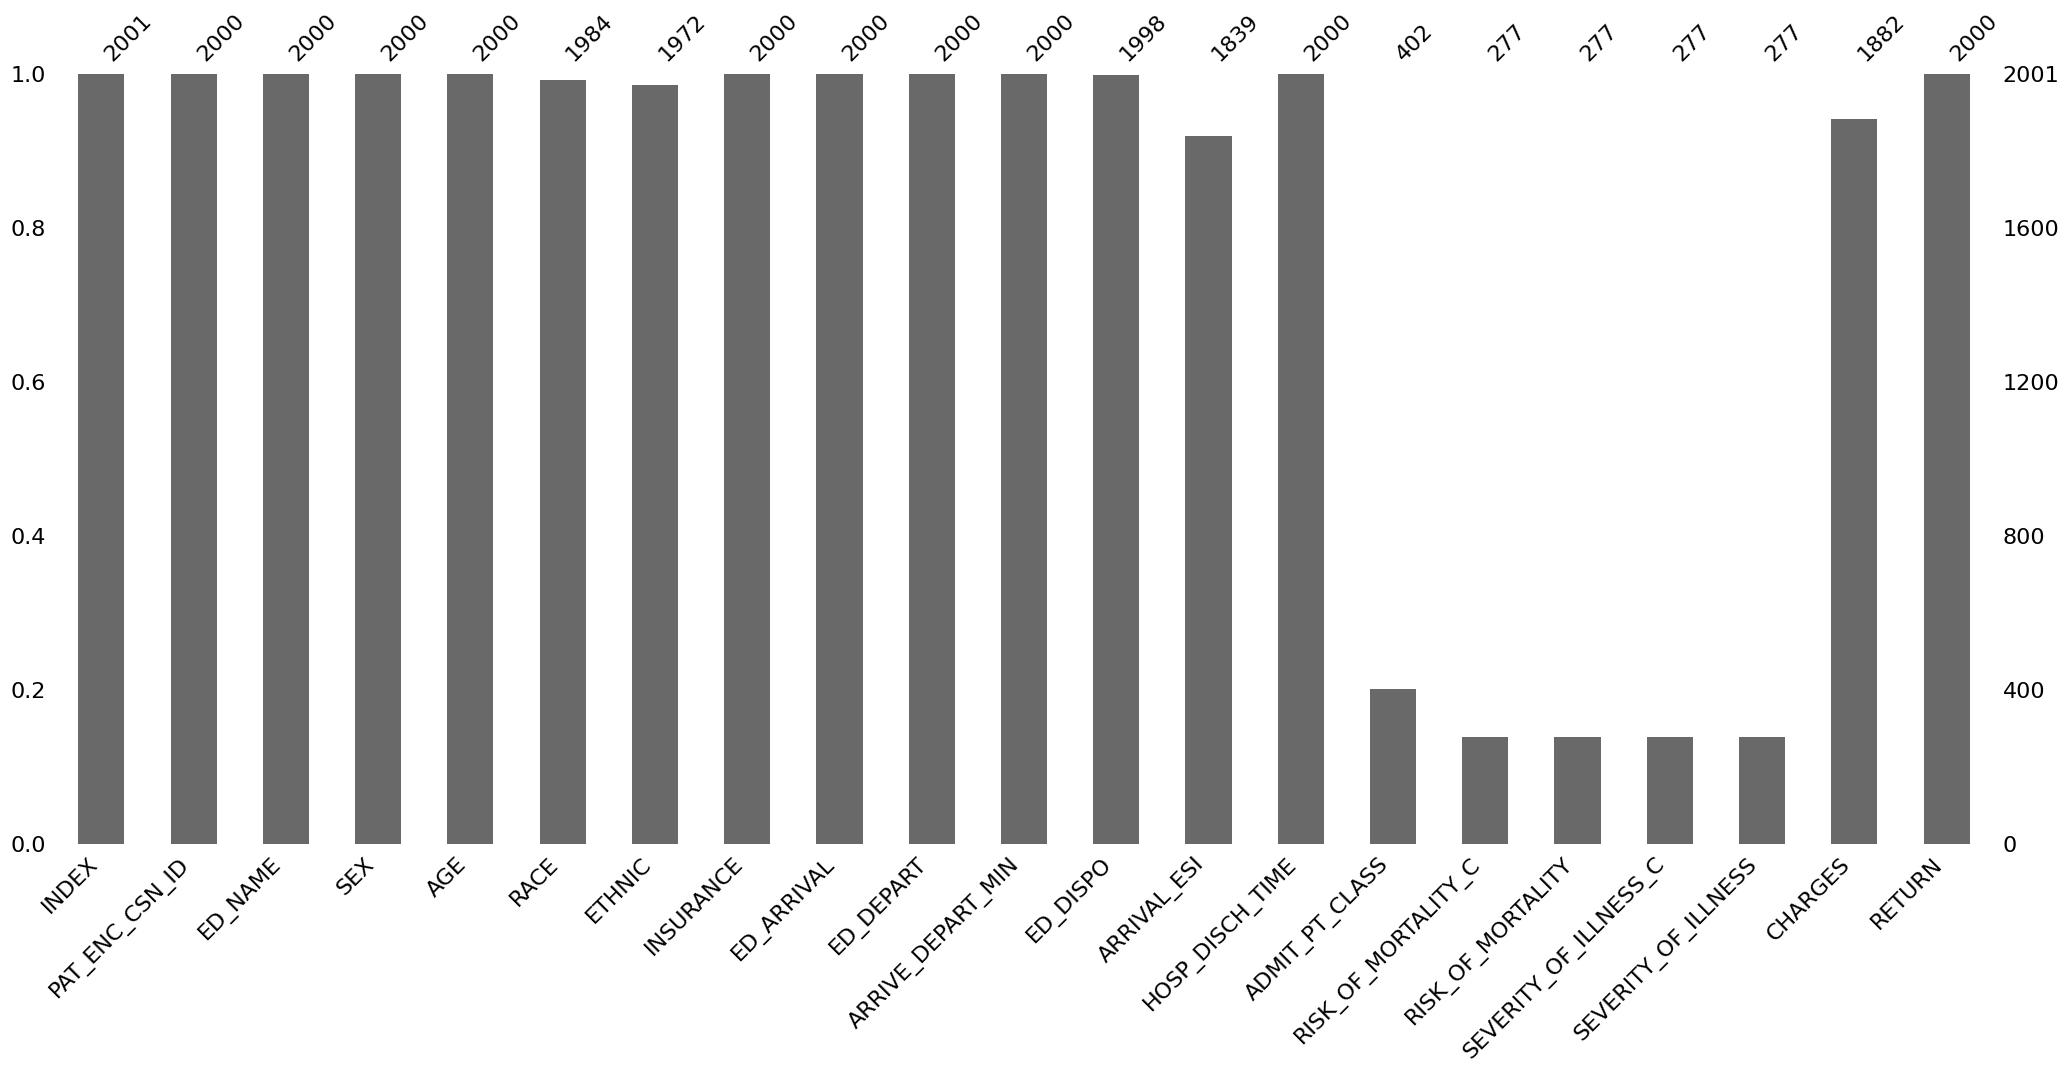

In [94]:
#Plotting non-missing data fo reach variable
msno.bar(df)

**Assigning Missing Values**

*Categorical Variables*

In cases where categorical variables have relatively little missing information, the missing values can be replaced with an unknown category.

In [95]:
# Handling Missing Categorical Info
df['RACE'] = df['RACE'].fillna('Unknown')
df['ETHNIC'] = df['ETHNIC'].fillna('Unknown')
df['ARRIVAL_ESI'] = df['ARRIVAL_ESI'].fillna('Missing')
df['ED_DISPO'] = df['ED_DISPO'].fillna('Missing')
df['ADMIT_PT_CLASS'] = df['ADMIT_PT_CLASS'].fillna('Missing')

*Quantitative Variables*

With quantitative data, a different approach to missigness is adopted. Here, the method called 'interpolation' where it replaces the missing values for ```CHARGES``` with its mean value. There are four variables with extremely high rates of missingness (> 80%), so simply those will be dropped from the dataframe.


In [96]:
#Replacing Missing Charge data with the mean of non-missing observations
df['CHARGES'] = df['CHARGES'].fillna((df['CHARGES'].mean()))

#Dropping variables with very high levels of missingness
df = df.drop(['RISK_OF_MORTALITY_C', 'RISK_OF_MORTALITY', 'SEVERITY_OF_ILLNESS_C', 'SEVERITY_OF_ILLNESS'], axis=1)

*Dropping Row with All Missing Values*

The final row of values (row 2000) is all null, therefore we will drop it from the dataframe.



In [97]:
df = df.drop([2000], axis = 0)


<Axes: >

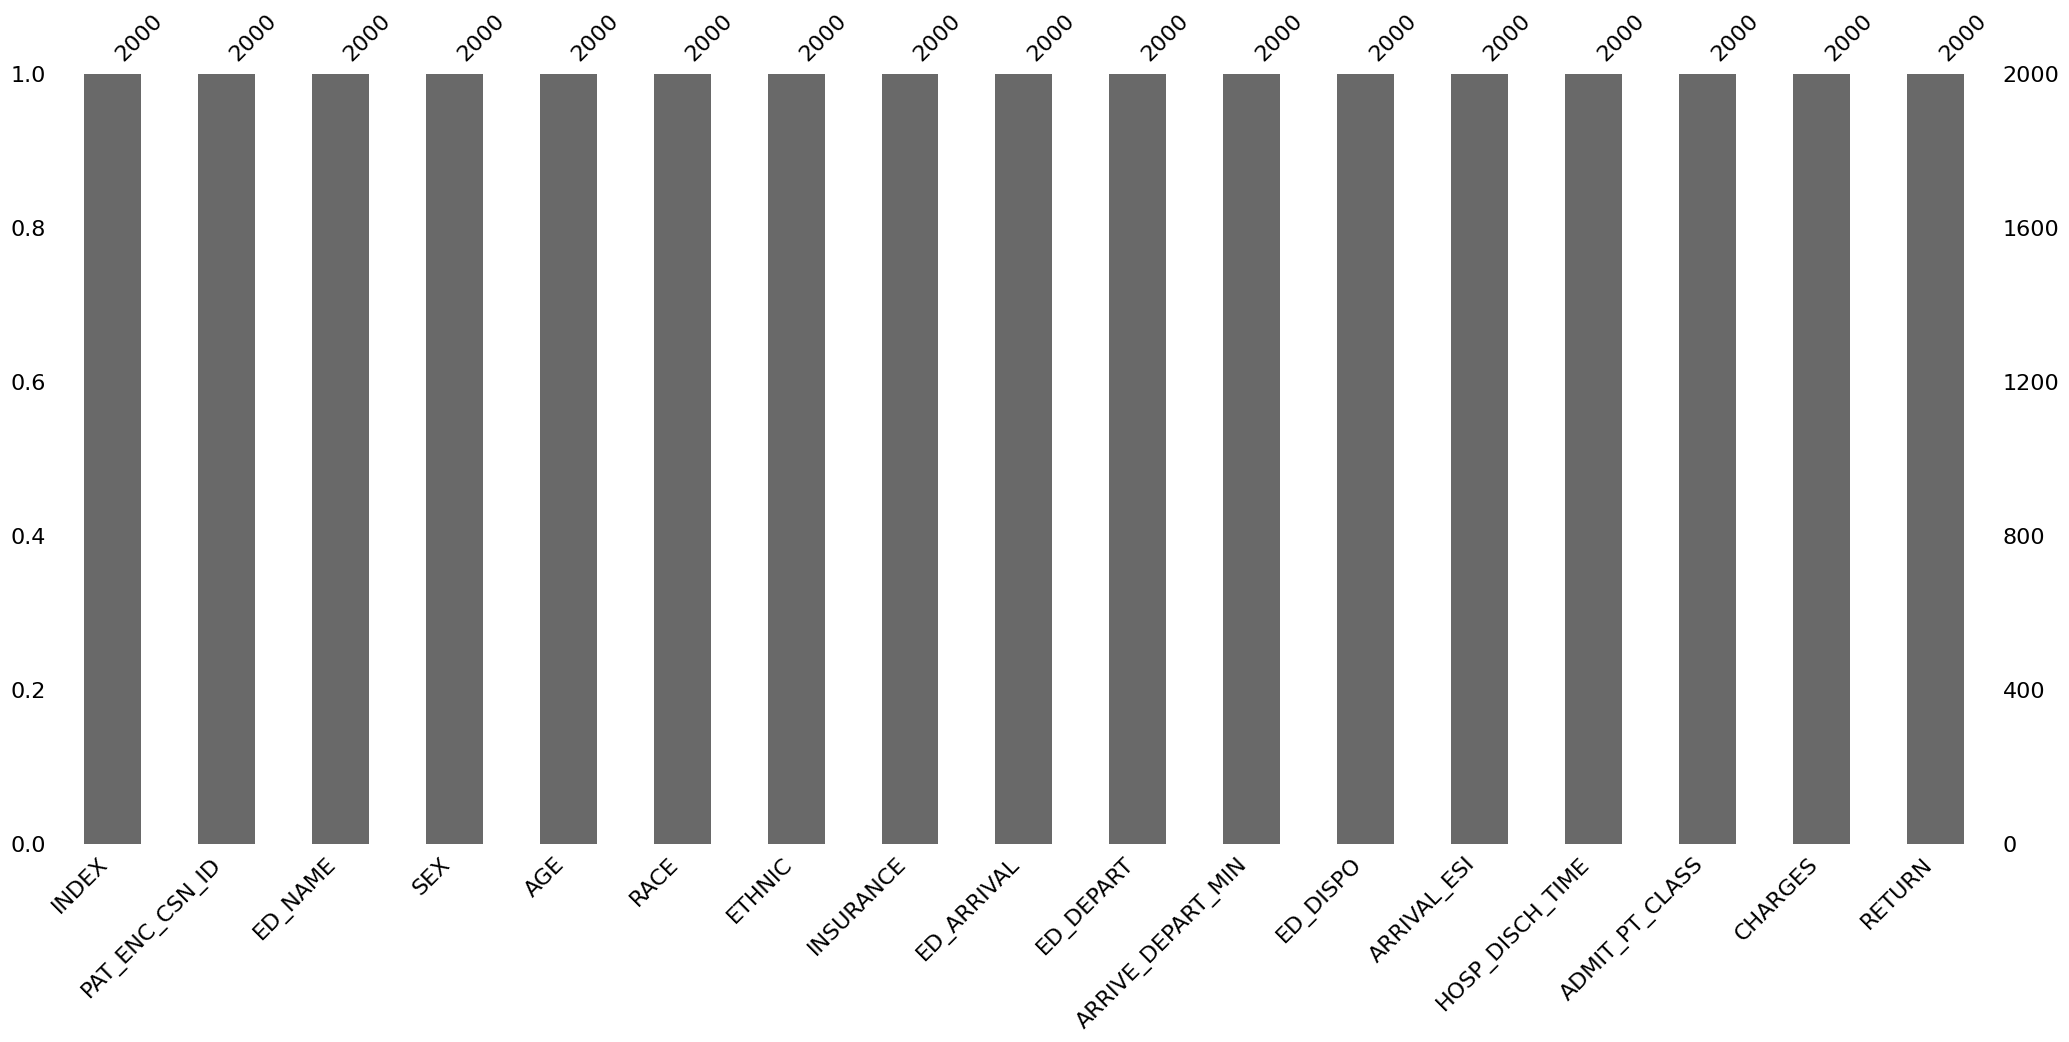

In [98]:
#Check percentages of missing values again to confirm that our replacements functioned correctly
msno.bar(df)

#[Section 6] **Feature Engineering**

A final step of preprocessing for logistic regressions involves feature engineering. At this stage, information provided will be transformed into formats that will help the algorithm predict the outcome and help to interpret the findings better.


**Date and Time Features**<br>
Three variables capture dates and times related to the visit:```ED_ARRIVAL_TIME```, ```ED_DEPARTURE_TIME```, and ```HOSP_DISCH_TIME```. These variables were treated as categorical variables in our data, which misses a lot of information that could be relevant to predictions of readmission (e.g., seasonality, systematic differences in overnight care). To try and capture this information, we may want to recode this data in a meaningful way.

In [99]:
#The ED Arrival time and Hospital Discharge Time variables follow a structure of 'mm/dd/yy hh:mm'
#A first step in the feature engineering is separating the date from time of day
#We can do this by splitting the variable into two based on the presence of a space
df[['ED_ARRIVAL_DATE','ED_ARRIVAL_TIME']] = df['ED_ARRIVAL'].str.split(' ').tolist()
df[['HOSP_DISCH_TIME_DATE', 'HOSP_DISCH_TIME_TIME']] = df['HOSP_DISCH_TIME'].str.split(' ').tolist()

#We'll look at some sample rows of data to confirm how the split worked
df.head()


,INDEX,PAT_ENC_CSN_ID,ED_NAME,SEX,AGE,RACE,ETHNIC,INSURANCE,ED_ARRIVAL,ED_DEPART,ARRIVE_DEPART_MIN,ED_DISPO,ARRIVAL_ESI,HOSP_DISCH_TIME,ADMIT_PT_CLASS,CHARGES,RETURN,ED_ARRIVAL_DATE,ED_ARRIVAL_TIME,HOSP_DISCH_TIME_DATE,HOSP_DISCH_TIME_TIME
0,1,1.799581e+09,HOSPITAL_A,Female,62.0,Black or African American,Not Hispanic or Latino,Medicaid,3/23/2017 8:42,3/23/2017 14:00,318.0,Discharge,4-Less Urgent,3/23/2017 14:00,Missing,2058.10,0.0,3/23/2017,8:42,3/23/2017,14:00
1,2,3.300799e+09,HOSPITAL_A,Male,59.0,White,Not Hispanic or Latino,Medicare,8/12/2017 14:32,8/12/2017 19:00,268.0,Discharge,4-Less Urgent,8/12/2017 19:00,Missing,63.96,0.0,8/12/2017,14:32,8/12/2017,19:00
2,3,5.618200e+08,HOSPITAL_B,Female,33.0,Black or African American,Not Hispanic or Latino,Self-pay,1/18/2017 17:12,1/19/2017 0:01,409.0,Left Early,4-Less Urgent,1/19/2017 0:01,Missing,392.67,0.0,1/18/2017,17:12,1/19/2017,0:01
3,4,6.513226e+08,HOSPITAL_B,Female,65.0,Black or African American,Not Hispanic or Latino,Commercial,5/23/2017 6:40,5/23/2017 13:32,412.0,Discharge,3-Urgent,5/23/2017 13:32,Missing,1811.28,0.0,5/23/2017,6:40,5/23/2017,13:32
4,5,3.003348e+09,HOSPITAL_B,Male,42.0,Black or African American,Not Hispanic or Latino,MA MCO,2/15/2017 14:43,2/15/2017 21:00,377.0,Discharge,4-Less Urgent,2/15/2017 21:00,Missing,1187.85,0.0,2/15/2017,14:43,2/15/2017,21:00


With the date and time successfully split in these variables, new features based on these characteristics can. be generated. For example, generate the variables that reflect the season of arrival and discharge.

In [100]:
#Function to classify month of arrival
def get_admission_season(date):
  month = int(date.split('/')[0])
  if (month > 11 or month <= 3):
    return 'Winter'
  elif (month == 4 or month == 5):
    return 'Spring'
  elif (month >= 6 and month <= 9):
    return 'Summer'
  else:
    return 'Fall'

In [101]:
#Function to classify month of discharge
def get_discharge_season(date):
  month = int(date.split('/')[0])
  if (month > 11 or month <= 3):
    return 'Winter'
  elif (month == 4 or month == 5):
    return 'Spring'
  elif (month >= 6 and month <= 9):
    return 'Summer'
  else:
    return 'Fall'

In [102]:
#Function to classify arrival time of day
def get_arrival_TOD(time):
  time = int(time.split(':')[0])
  if (time >= 0 and time <= 7):
    return 'Night-AM'
  elif (time > 7 and time <= 12):
    return 'Morning'
  elif (time > 12 and time <= 16):
    return 'Afternoonl'
  elif (time > 16 and time <= 19):
    return 'Evening'
  else:
    return 'Night-PM'

In [103]:
#Function to classify discharge time of day
def get_discharge_TOD(time):
  time = int(time.split(':')[0])
  if (time >= 0 and time <= 7):
    return 'Night-AM'
  elif (time > 7 and time <= 12):
    return 'Morning'
  elif (time > 12 and time <= 16):
    return 'Afternoon'
  elif (time > 16 and time <= 19):
    return 'Evening'
  else:
    return 'Night-PM'

In [104]:
#With these functions defined, now use them to classify the observations!
df['ED_ARRIVAL_SEASON'] = df['ED_ARRIVAL_DATE'].apply(get_admission_season)
df['ED_ARRIVAL_TOD'] = df['ED_ARRIVAL_TIME'].apply(get_arrival_TOD)
df['HOSP_DISCH_SEASON'] = df['HOSP_DISCH_TIME_DATE'].apply(get_discharge_season)
df['HOSP_DISCH_TOD'] = df['HOSP_DISCH_TIME_TIME'].apply(get_discharge_TOD)

In [105]:
#Dropping redundant/unnecessary columns
Epic_clean = df.drop(['INDEX','PAT_ENC_CSN_ID','ED_ARRIVAL','ED_DEPART'],  axis=1)

In [106]:
Epic_clean.head()

,ED_NAME,SEX,AGE,RACE,ETHNIC,INSURANCE,ARRIVE_DEPART_MIN,ED_DISPO,ARRIVAL_ESI,HOSP_DISCH_TIME,ADMIT_PT_CLASS,CHARGES,RETURN,ED_ARRIVAL_DATE,ED_ARRIVAL_TIME,HOSP_DISCH_TIME_DATE,HOSP_DISCH_TIME_TIME,ED_ARRIVAL_SEASON,ED_ARRIVAL_TOD,HOSP_DISCH_SEASON,HOSP_DISCH_TOD
0,HOSPITAL_A,Female,62.0,Black or African American,Not Hispanic or Latino,Medicaid,318.0,Discharge,4-Less Urgent,3/23/2017 14:00,Missing,2058.10,0.0,3/23/2017,8:42,3/23/2017,14:00,Winter,Morning,Winter,Afternoon
1,HOSPITAL_A,Male,59.0,White,Not Hispanic or Latino,Medicare,268.0,Discharge,4-Less Urgent,8/12/2017 19:00,Missing,63.96,0.0,8/12/2017,14:32,8/12/2017,19:00,Summer,Afternoonl,Summer,Evening
2,HOSPITAL_B,Female,33.0,Black or African American,Not Hispanic or Latino,Self-pay,409.0,Left Early,4-Less Urgent,1/19/2017 0:01,Missing,392.67,0.0,1/18/2017,17:12,1/19/2017,0:01,Winter,Evening,Winter,Night-AM
3,HOSPITAL_B,Female,65.0,Black or African American,Not Hispanic or Latino,Commercial,412.0,Discharge,3-Urgent,5/23/2017 13:32,Missing,1811.28,0.0,5/23/2017,6:40,5/23/2017,13:32,Spring,Night-AM,Spring,Afternoon
4,HOSPITAL_B,Male,42.0,Black or African American,Not Hispanic or Latino,MA MCO,377.0,Discharge,4-Less Urgent,2/15/2017 21:00,Missing,1187.85,0.0,2/15/2017,14:43,2/15/2017,21:00,Winter,Afternoonl,Winter,Night-PM


**Coding Categorical Variables**

In [107]:
#Creating a new dataframe with only the categorical variables
df_with_cat=Epic_clean[['ED_NAME', 'SEX','RACE','ETHNIC',
                        'INSURANCE','ED_DISPO', 'ARRIVAL_ESI',
                        'ADMIT_PT_CLASS', 'ED_ARRIVAL_SEASON',
                        'HOSP_DISCH_SEASON', 'ED_ARRIVAL_TOD',
                        'HOSP_DISCH_TOD']]
df_dummies=pd.get_dummies(df_with_cat,drop_first=True)
df_dummies.head()

,ED_NAME_HOSPITAL_B,ED_NAME_HOSPITAL_C,SEX_Male,RACE_Asian,RACE_Black or African American,RACE_Native Hawaiian or Other Pacific Islander,RACE_Other,RACE_Two or More Races,RACE_Unknown,RACE_White,ETHNIC_Hispanic or Latino,ETHNIC_Not Hispanic or Latino,ETHNIC_Unknown,INSURANCE_Commercial,INSURANCE_MA MCO,INSURANCE_Medicaid,INSURANCE_Medicare,INSURANCE_Other,INSURANCE_Self-pay,ED_DISPO_Discharge,ED_DISPO_LWBS after Triage,ED_DISPO_LWBS before Triage,ED_DISPO_Left Early,ED_DISPO_Missing,ED_DISPO_Observation,ED_DISPO_Other,ARRIVAL_ESI_2-Emergent,ARRIVAL_ESI_3-Urgent,ARRIVAL_ESI_4-Less Urgent,ARRIVAL_ESI_5-Non-Urgent,ARRIVAL_ESI_Missing,ADMIT_PT_CLASS_Missing,ADMIT_PT_CLASS_Observation,ADMIT_PT_CLASS_Psych Inpatient,ADMIT_PT_CLASS_Trauma Inpatient,ED_ARRIVAL_SEASON_Spring,ED_ARRIVAL_SEASON_Summer,ED_ARRIVAL_SEASON_Winter,HOSP_DISCH_SEASON_Spring,HOSP_DISCH_SEASON_Summer,HOSP_DISCH_SEASON_Winter,ED_ARRIVAL_TOD_Evening,ED_ARRIVAL_TOD_Morning,ED_ARRIVAL_TOD_Night-AM,ED_ARRIVAL_TOD_Night-PM,HOSP_DISCH_TOD_Evening,HOSP_DISCH_TOD_Morning,HOSP_DISCH_TOD_Night-AM,HOSP_DISCH_TOD_Night-PM
0,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False
2,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,True,False
3,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False
4,True,False,True,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True


In [108]:
#Creating another df with just the numeric variables
#Also dropping variables that are meaningless like index and patient case number
df_num=Epic_clean[['RETURN','AGE','ARRIVE_DEPART_MIN','CHARGES']]
df_num.head()

,RETURN,AGE,ARRIVE_DEPART_MIN,CHARGES
0,0.0,62.0,318.0,2058.10
1,0.0,59.0,268.0,63.96
2,0.0,33.0,409.0,392.67
3,0.0,65.0,412.0,1811.28
4,0.0,42.0,377.0,1187.85


**Rescaling Continuous Variables**

*   The continuous variables are on very different scales than the categorical variables that only take on values of 0 or 1
*   Differences in scale con sometimes lead to challenges in interpreting importance of various features
Therefore, the continuous variables will be rescaled.

In [109]:
# Normalization with pandas
scaler=MinMaxScaler()
df_num.iloc[:,[1,2,3]] = scaler.fit_transform(df_num.iloc[:,[1,2,3]].to_numpy())

#Equivalent to:
#df_num['ARRIVE_DEPART_MIN_SCALED'] = (df_num['ARRIVE_DEPART_MIN'] - df_num['ARRIVE_DEPART_MIN'].min()) / (df_num['ARRIVE_DEPART_MIN'].max() - df_num['ARRIVE_DEPART_MIN'].min())
#df_num['CHARGES_SCALED'] = (df_num['CHARGES'] - df_num['CHARGES'].min()) / (df_num['CHARGES'].max() - df_num['CHARGES'].min())

df_num.head()

,RETURN,AGE,ARRIVE_DEPART_MIN,CHARGES
0,0.0,0.408163,0.170109,0.233157
1,0.0,0.377551,0.142935,0.002794
2,0.0,0.112245,0.219565,0.040767
3,0.0,0.438776,0.221196,0.204645
4,0.0,0.204082,0.202174,0.132626


In [110]:
#Join back with categorical variables

Epic_dummy = pd.concat([df_num, df_dummies], axis=1)
Epic_dummy.head()

,RETURN,AGE,ARRIVE_DEPART_MIN,CHARGES,ED_NAME_HOSPITAL_B,ED_NAME_HOSPITAL_C,SEX_Male,RACE_Asian,RACE_Black or African American,RACE_Native Hawaiian or Other Pacific Islander,RACE_Other,RACE_Two or More Races,RACE_Unknown,RACE_White,ETHNIC_Hispanic or Latino,ETHNIC_Not Hispanic or Latino,ETHNIC_Unknown,INSURANCE_Commercial,INSURANCE_MA MCO,INSURANCE_Medicaid,INSURANCE_Medicare,INSURANCE_Other,INSURANCE_Self-pay,ED_DISPO_Discharge,ED_DISPO_LWBS after Triage,ED_DISPO_LWBS before Triage,ED_DISPO_Left Early,ED_DISPO_Missing,ED_DISPO_Observation,ED_DISPO_Other,ARRIVAL_ESI_2-Emergent,ARRIVAL_ESI_3-Urgent,ARRIVAL_ESI_4-Less Urgent,ARRIVAL_ESI_5-Non-Urgent,ARRIVAL_ESI_Missing,ADMIT_PT_CLASS_Missing,ADMIT_PT_CLASS_Observation,ADMIT_PT_CLASS_Psych Inpatient,ADMIT_PT_CLASS_Trauma Inpatient,ED_ARRIVAL_SEASON_Spring,ED_ARRIVAL_SEASON_Summer,ED_ARRIVAL_SEASON_Winter,HOSP_DISCH_SEASON_Spring,HOSP_DISCH_SEASON_Summer,HOSP_DISCH_SEASON_Winter,ED_ARRIVAL_TOD_Evening,ED_ARRIVAL_TOD_Morning,ED_ARRIVAL_TOD_Night-AM,ED_ARRIVAL_TOD_Night-PM,HOSP_DISCH_TOD_Evening,HOSP_DISCH_TOD_Morning,HOSP_DISCH_TOD_Night-AM,HOSP_DISCH_TOD_Night-PM
0,0.0,0.408163,0.170109,0.233157,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False
1,0.0,0.377551,0.142935,0.002794,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False
2,0.0,0.112245,0.219565,0.040767,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,True,False
3,0.0,0.438776,0.221196,0.204645,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False
4,0.0,0.204082,0.202174,0.132626,True,False,True,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True


#[Section 7] **Saving the clean datasets**
The dataset is now prepared for analysis!
 These data can be used in the logistic regression to build and evaluate the model for predicting the risk of readmission.

In [111]:
Epic_clean.to_csv('Epic-clean.csv')
files.download('Epic-clean.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [112]:
Epic_dummy.to_csv('Epic-dummy.csv')
files.download('Epic-dummy.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>